# RNN,  LSTM vizual plot

In [2]:
! pip install tensorflow
! pip install Keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft
from scipy import signal
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import io
import pandas as pd
import numpy as np
import matplotlib  as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler 

  Using cached tensorflow-2.4.1-cp38-cp38-win_amd64.whl (370.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Processing c:\users\20522\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
Processing c:\users\20522\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73\wrapt-1.12.1-py3-none-any.whl
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached protobuf-3.14.0-py2.py3-none-any.whl (173 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached grpcio-1.32.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached tensorboard-2.4.1-py3-none-any.whl (10.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached flatbuf

In [3]:
%matplotlib inline
dfx=pd.read_csv('data_zero.csv')
calculation_speed = 100
dfx[::calculation_speed]

,miliseka,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
0,1.366790e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
100,1.366790e+12,0.018124,0.017502,-0.002184,-0.005623,-0.001873,0.001875,-2.812147e-03,-0.003438
200,1.366790e+12,0.027496,0.034374,-0.011560,-0.013437,0.000313,0.003433,3.750324e-03,-0.000313
300,1.366790e+12,-0.000629,0.009064,-0.009375,-0.007498,0.002186,0.004059,2.384186e-07,-0.001250
400,1.366790e+12,-0.003128,-0.001875,-0.027185,-0.028751,0.002499,0.005934,-1.874924e-03,-0.003125
...,...,...,...,...,...,...,...,...,...
149500,1.366792e+12,0.035624,0.042498,-0.013437,-0.012186,0.001875,0.004374,3.750086e-03,-0.000313
149600,1.366792e+12,0.008749,0.011562,-0.006872,-0.008436,-0.000311,0.006247,-4.687309e-03,-0.005313
149700,1.366792e+12,-0.005629,0.001873,-0.017187,-0.019373,0.003437,0.009996,2.187729e-03,-0.001875
149800,1.366792e+12,0.010000,0.011559,-0.014059,-0.012812,0.001566,0.003437,-9.374619e-04,-0.001875


In [4]:
# **Why is do we have 3 values as inputs?**

# We will see latter that RNNs, LTSMs require 3D input for the X values. This is often very confusing for beginners and people who return back to the field after a break (make sure you remember this, because even if you are an employeed data scientist you might not work with RNNs and forget this information, which is fundamental to understanding of RNNs). What are those 3 dimensions:

# - **Samples / how many sequences**. One sequence is one sample. A batch is comprised of one or more samples (batch size not specified).
# - **Time Steps / how many values in each sample**. One time step is one point of observation in the sample.
# - **Features / collumn count**. One feature is one observation at a time step. This is essentially how many values at each time step you have.

# Say we want to feed this into our network:

In [5]:
def taking_of_nan_values_DF(df):
    print("taking_of_nan_values_DF(df)")
    # interpolation
    df = df.interpolate(method='linear', limit_direction='forward', axis=0)
    # taking of nullmi
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
    return df

In [6]:
df = pd.DataFrame(dfx[::calculation_speed])
df = taking_of_nan_values_DF(pd.DataFrame(df))
df

taking_of_nan_values_DF(df)


,miliseka,P20113,P20110,P10216,P10215,P10116,P10115,P10110,P7500
0,1.366790e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
100,1.366790e+12,0.018124,0.017502,-0.002184,-0.005623,-0.001873,0.001875,-2.812147e-03,-0.003438
200,1.366790e+12,0.027496,0.034374,-0.011560,-0.013437,0.000313,0.003433,3.750324e-03,-0.000313
300,1.366790e+12,-0.000629,0.009064,-0.009375,-0.007498,0.002186,0.004059,2.384186e-07,-0.001250
400,1.366790e+12,-0.003128,-0.001875,-0.027185,-0.028751,0.002499,0.005934,-1.874924e-03,-0.003125
...,...,...,...,...,...,...,...,...,...
149500,1.366792e+12,0.035624,0.042498,-0.013437,-0.012186,0.001875,0.004374,3.750086e-03,-0.000313
149600,1.366792e+12,0.008749,0.011562,-0.006872,-0.008436,-0.000311,0.006247,-4.687309e-03,-0.005313
149700,1.366792e+12,-0.005629,0.001873,-0.017187,-0.019373,0.003437,0.009996,2.187729e-03,-0.001875
149800,1.366792e+12,0.010000,0.011559,-0.014059,-0.012812,0.001566,0.003437,-9.374619e-04,-0.001875


In [7]:
def plot_learning_curves(loss):
    print("plot_learning_curves(loss)")
    plt.figure(figsize=(14,5))
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    # plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)  


In [8]:
def RNN2(new_dataset, valid_data, interval_to_train, column, scaler, lstm_model, parameter):      
    # construct the dataset for prediction
    inputs_data=new_dataset[len(new_dataset)-len(valid_data)-parameter:].values
    inputs_data=inputs_data.reshape(-1,1)
    inputs_data=scaler.transform(inputs_data)
    X_test=[]
    for i in range(parameter,inputs_data.shape[0]):
        X_test.append(inputs_data[i-parameter:i,0])
    X_test=np.array(X_test)
    X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

    predicted_closing_price=lstm_model.predict(X_test)
#     print(predicted_closing_price)
    predicted_closing_price=scaler.inverse_transform(predicted_closing_price)
#     print(predicted_closing_price)

    train_data=new_dataset[:interval_to_train]
    valid_data=new_dataset[interval_to_train:]
    valid_data = valid_data.assign(Predictions=predicted_closing_price)
    plt.figure(figsize=(14,5))
    plt.plot(new_dataset[str(column)])    
    plt.title('RNN LSTM ' + str(column), size=12)
    plt.plot(valid_data.index, predicted_closing_price)
    plt.show()
    # Calculate the MSE for predictions
    from sklearn.metrics import mean_squared_error
    mean_squared_error(valid_data[str(column)],predicted_closing_price) 
   # Increase the epoch count and retrain the network, see if MSE improves

In [9]:
def RNN(df):
    columns = df.columns
    print("Starting RNN(df)")
    df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], unit='ms')
    import datetime    
    rows = len(df)
    # parameters
    parameter = 10
    number_of_epochs = 10
    number_of_batch_size = 100
    interval_to_train = int(rows/2)

    columns = df.columns
    for column in columns:
        if column != df.columns[0]:

            print(column)
            df['Date'] = df[df.columns[0]]
            # Timestamp('2017-03-22 15:16:45.433502912')
            df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
            df.index=df['Date']
            
            data=df.sort_index(ascending=True,axis=0)
            new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date',str(column)])

            for i in range(0,len(data)):
                new_dataset["Date"][i]=data['Date'][i]
                new_dataset[str(column)][i]=data[str(column)][i]

            train_data = new_dataset[0:interval_to_train]
            valid_data = new_dataset[interval_to_train:]

            new_dataset.index=new_dataset.Date
            new_dataset.drop("Date",axis=1,inplace=True)

            new_dataset.tail(5)

            scaler=MinMaxScaler(feature_range=(0,1))
            scaled_data=scaler.fit_transform(new_dataset)

            # construct the sequences: we will try to predict y
            # ... based on last parameter values of x
            x_train_data, y_train_data=[],[]
            for i in range(parameter,len(train_data)):
                x_train_data.append(scaled_data[i-parameter:i,0])
                y_train_data.append(scaled_data[i,0])

            # convert to numpy
            x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
            print(x_train_data.shape)

            # reshape it to 3D
            x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

            # to see how the shape changes we can again print it out
            lstm_model=Sequential()
            lstm_model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train_data.shape[1],1)))
            lstm_model.add(LSTM(units=50))
            lstm_model.add(Dense(1))
            lstm_model.compile(loss='mean_squared_error',optimizer='adam')
            
            history = lstm_model.fit(x_train_data,y_train_data, epochs=number_of_epochs, batch_size=number_of_batch_size,verbose=1)
            
            plot_learning_curves(history.history["loss"])
            plt.show()
            
            RNN2(new_dataset, valid_data, interval_to_train, column, scaler, lstm_model, parameter)
          
           # Increase the epoch count and retrain the network, see if MSE improves


Starting RNN(df)
P20113
(740, 10)
Epoch 1/10
8/8 [==============================] - 4s 10ms/step - loss: 0.1634
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0236
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0197
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0212
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0177
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 9/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0155
Epoch 10/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0146
plot_learning_curves(loss)


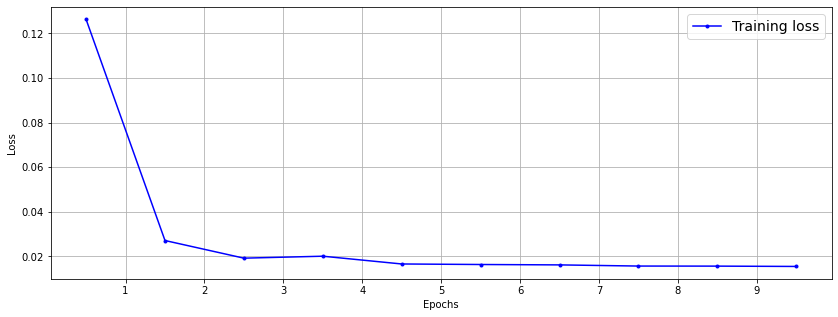

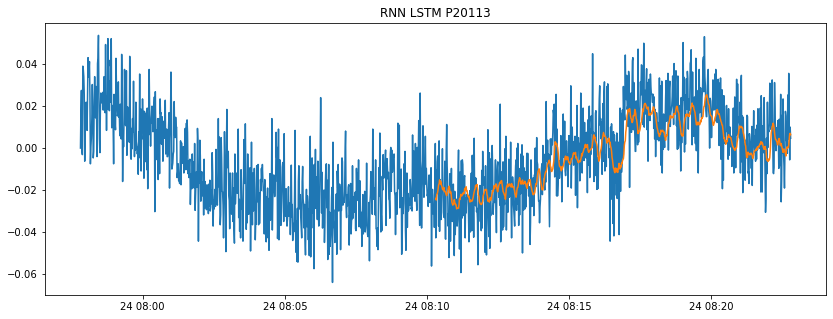

P20110
(740, 10)
Epoch 1/10
8/8 [==============================] - 3s 10ms/step - loss: 0.1425
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0287
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0223
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0216
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0172
Epoch 6/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0169
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0165
Epoch 9/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 10/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0158
plot_learning_curves(loss)


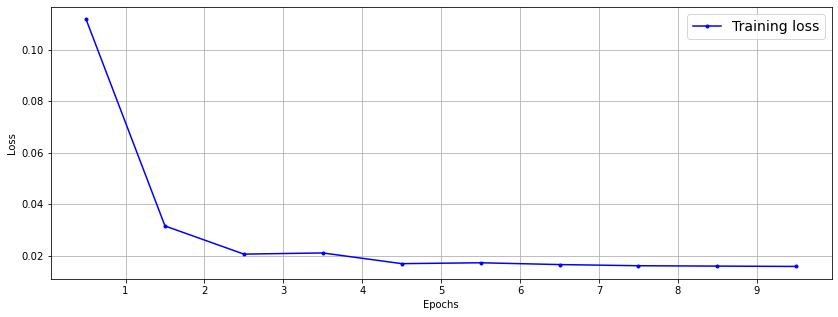

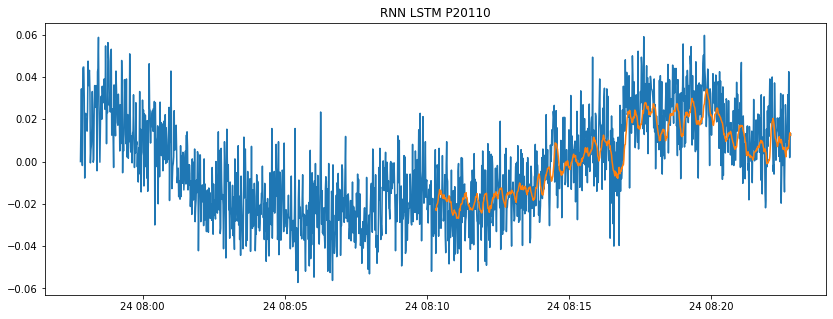

P10216
(740, 10)
Epoch 1/10
8/8 [==============================] - 4s 9ms/step - loss: 0.2566
Epoch 2/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0204
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0070
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0055
Epoch 8/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0053
Epoch 9/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0054
Epoch 10/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0053
plot_learning_curves(loss)


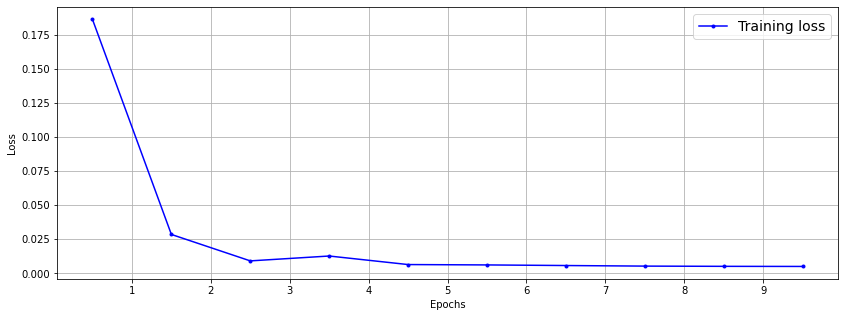

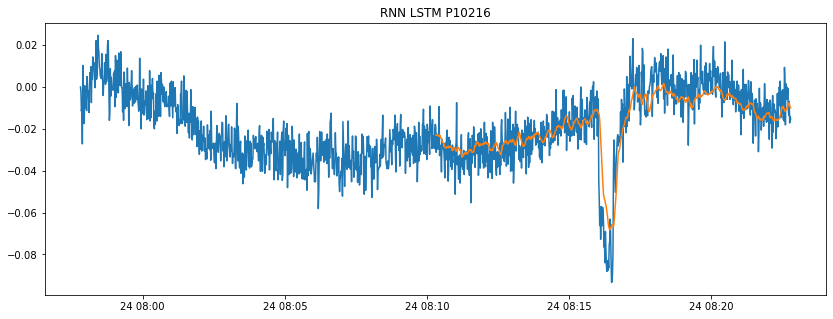

P10215
(740, 10)
Epoch 1/10
8/8 [==============================] - 4s 10ms/step - loss: 0.3641
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0301
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 4/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0053
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 7/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 8/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 9/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0036
Epoch 10/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0035
plot_learning_curves(loss)


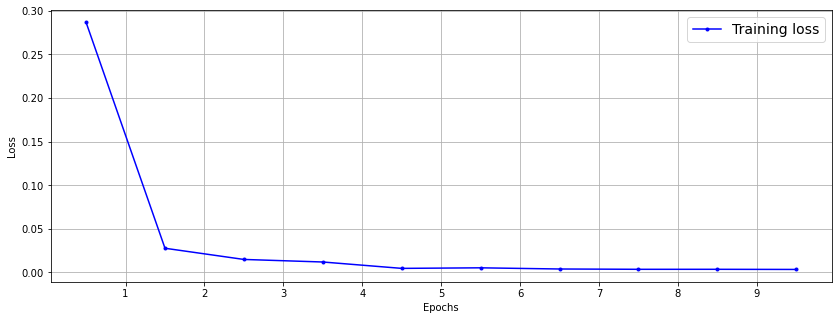

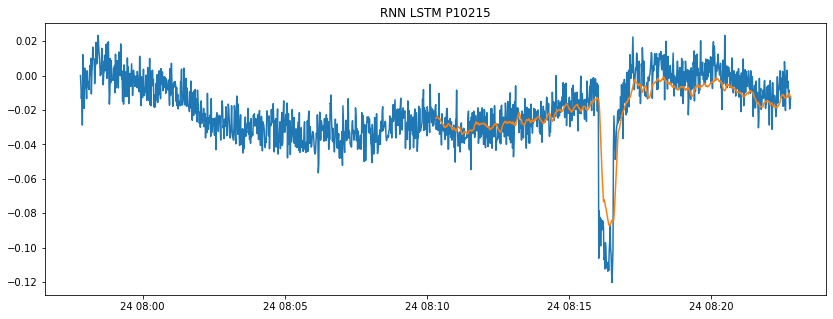

P10116
(740, 10)
Epoch 1/10
8/8 [==============================] - 4s 10ms/step - loss: 0.2784
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0210
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0134
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0136
Epoch 5/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0056
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0061
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0049
Epoch 8/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0042
Epoch 9/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 10/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0043
plot_learning_curves(loss)


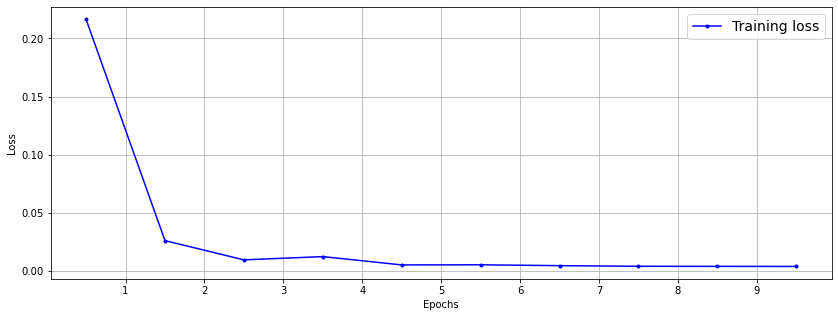

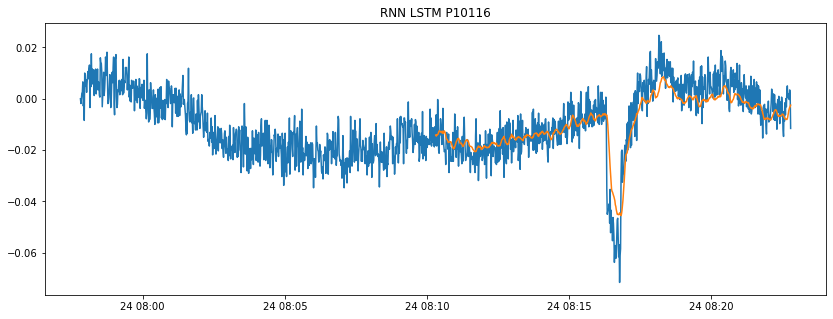

P10115
(740, 10)
Epoch 1/10
8/8 [==============================] - 4s 10ms/step - loss: 0.2932
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0235
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0104
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0061
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0058
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 8/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0039
Epoch 9/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0039
Epoch 10/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0040
plot_learning_curves(loss)


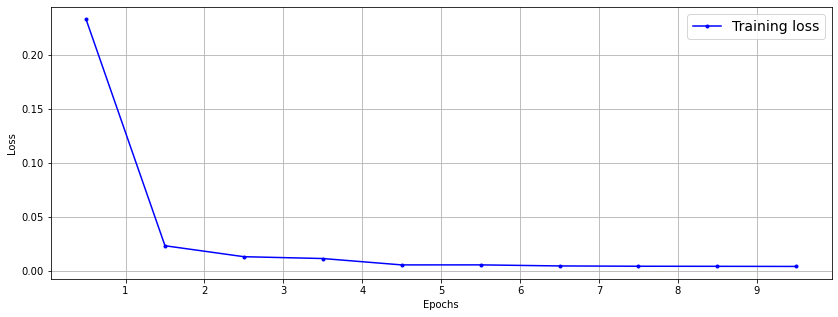

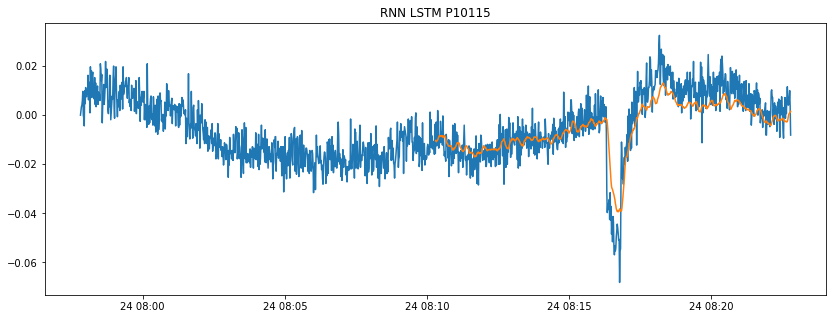

P10110
(740, 10)
Epoch 1/10
8/8 [==============================] - 4s 10ms/step - loss: 0.1906
Epoch 2/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0371
Epoch 3/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0200
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0234
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 6/10
8/8 [==============================] - 0s 9ms/step - loss: 0.0207
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0208
Epoch 8/10
8/8 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 9/10
8/8 [==============================] - 0s 11ms/step - loss: 0.0195
Epoch 10/10
8/8 [==============================] - 0s 12ms/step - loss: 0.0182
plot_learning_curves(loss)


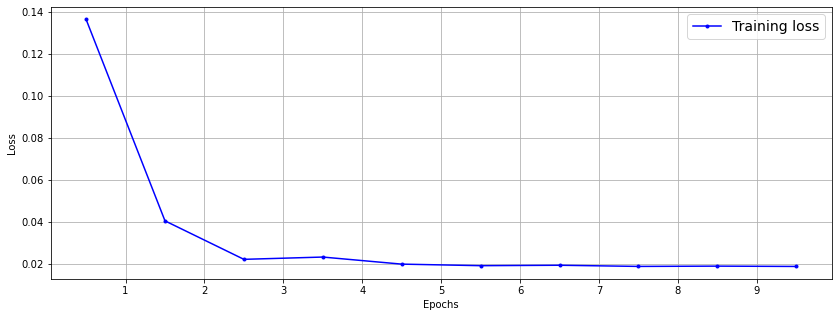

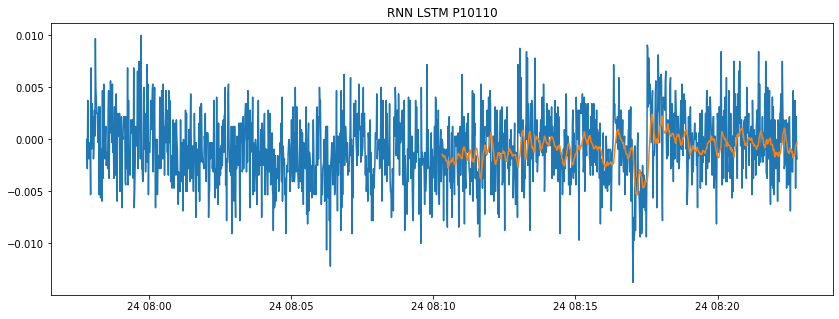

P7500
(740, 10)
Epoch 1/10
8/8 [==============================] - 4s 14ms/step - loss: 0.2244
Epoch 2/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0229
Epoch 3/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0157
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0171
Epoch 5/10
8/8 [==============================] - 0s 19ms/step - loss: 0.0117
Epoch 6/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0113
Epoch 7/10
8/8 [==============================] - 0s 14ms/step - loss: 0.0107
Epoch 8/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0100
Epoch 9/10
8/8 [==============================] - 0s 16ms/step - loss: 0.0101
Epoch 10/10
8/8 [==============================] - 0s 15ms/step - loss: 0.0111
plot_learning_curves(loss)


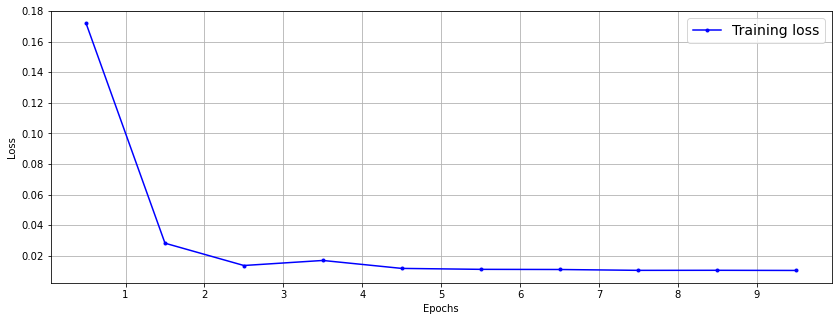

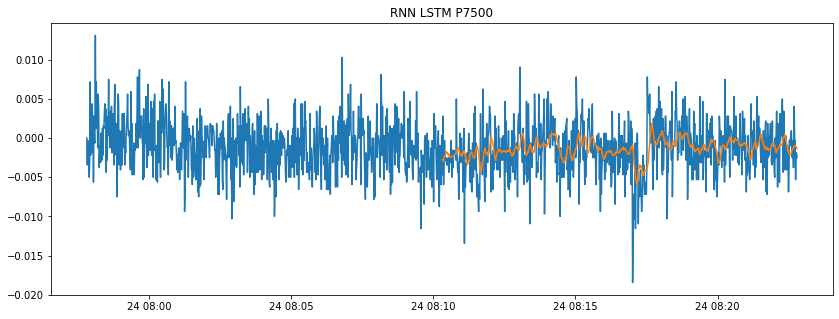

In [10]:
RNN(df)